# <p style="text-align: center;">COVID-19 World Vaccination Progress </p>

### Problem Definition

Covid-19 pandemic has been a challenge with over hundred million cases and over two million deaths around the globe. Wearing a mask and social distancing have become a new culture to limit the transmission of this deadly virus. While we hope to return back to our normal life from few years back, vaccination is the key, not only in one county or region but through out the entire world. Therefore it is necessary to track the vaccination progress of every country to save lives, limit spread, and move back to our old normal. In this project, I will track the vaccination progress around the globe based on the vaccine they use, total vaccinations, and daily vaccinations rate.

### Understanding Dataset

The vaccination progress dataset is obtained from Kaggle. The data contains the following information:

1. Country- this is the country for which the vaccination information is provided;
2. Country ISO Code - ISO code for the country;
3. Date - date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total;
4. Total number of vaccinations - this is the absolute number of total immunizations in the country;
5. Total number of people vaccinated - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people;
6. Total number of people fully vaccinated - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;
7. Daily vaccinations (raw) - for a certain data entry, the number of vaccination for that date/country;
8. Daily vaccinations - for a certain data entry, the number of vaccination for that date/country;
9. Total vaccinations per hundred - ratio (in percent) between vaccination number and total population up to the date in the country;
10. Total number of people vaccinated per hundred - ratio (in percent) between population immunized and total population up to the date in the country;
11. Total number of people fully vaccinated per hundred - ratio (in percent) between population fully immunized and total population up to the date in the country;
12. Number of vaccinations per day - number of daily vaccination for that day and country;
13. Daily vaccinations per million - ratio (in ppm) between vaccination number and total population for the current date in the country;
14. Vaccines used in the country - total number of vaccines used in the country (up to date);
15. Source name - source of the information (national authority, international organization, local organization etc.);
16. Source website - website of the source of information

<u><b>Acknowledgement:</u></b><br>
    The data is made available in Kaggle by [Gabriel Preda](https://www.kaggle.com/gpreda). The dataset information provided above is as mentioned by the author.

### Libraries


In [293]:
#dataframe
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf

%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()


# suppressing warnings
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [294]:
df = pd.read_csv("../input/covid-world-vaccination-progress/country_vaccinations.csv")
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


### Exploratory Data Analysis

In [295]:
#Dataframe column characteristics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3946 entries, 0 to 3945
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              3946 non-null   object 
 1   iso_code                             3662 non-null   object 
 2   date                                 3946 non-null   object 
 3   total_vaccinations                   2577 non-null   float64
 4   people_vaccinated                    2176 non-null   float64
 5   people_fully_vaccinated              1431 non-null   float64
 6   daily_vaccinations_raw               2179 non-null   float64
 7   daily_vaccinations                   3800 non-null   float64
 8   total_vaccinations_per_hundred       2577 non-null   float64
 9   people_vaccinated_per_hundred        2176 non-null   float64
 10  people_fully_vaccinated_per_hundred  1431 non-null   float64
 11  daily_vaccinations_per_million

In [296]:
#rows and columns in the dataframe
df.shape


(3946, 15)

In [297]:
#number of empty cells in the data frame
df.isnull().sum()

country                                   0
iso_code                                284
date                                      0
total_vaccinations                     1369
people_vaccinated                      1770
people_fully_vaccinated                2515
daily_vaccinations_raw                 1767
daily_vaccinations                      146
total_vaccinations_per_hundred         1369
people_vaccinated_per_hundred          1770
people_fully_vaccinated_per_hundred    2515
daily_vaccinations_per_million          146
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [298]:
#list of different names of countries in the dataset
df["country"].unique()

array(['Albania', 'Algeria', 'Andorra', 'Anguilla', 'Argentina',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Bermuda', 'Bolivia', 'Brazil',
       'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands', 'Chile',
       'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'England',
       'Estonia', 'Faeroe Islands', 'Falkland Islands', 'Finland',
       'France', 'Germany', 'Gibraltar', 'Greece', 'Greenland',
       'Guernsey', 'Guyana', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Japan',
       'Jersey', 'Kuwait', 'Latvia', 'Lebanon', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Macao', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Monaco', 'Morocco', 'Myanmar', 'Nepal',
       'Netherlands', 'New Zealand', 'Northern Cyprus',
       'Northern Ireland', 'Norway', 'Oman', 'Paki

In [299]:
#list of vaccines names
df['vaccines'].unique()

array(['Pfizer/BioNTech', 'Sputnik V', 'Oxford/AstraZeneca',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Sputnik V',
       'Pfizer/BioNTech, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Sinovac', 'Sinopharm/Beijing',
       'Moderna, Pfizer/BioNTech', 'Pfizer/BioNTech, Sinovac',
       'Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac',
       'Oxford/AstraZeneca, Pfizer/BioNTech',
       'Covaxin, Oxford/AstraZeneca', 'Sinovac',
       'Oxford/AstraZeneca, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V',
       'Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V', 'Johnson&Johnson',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V'],
      dtype=object)

In [300]:
#total number of countries
len(df['country'].unique())


102

In [301]:
# total number of vaccines/vaccine combinations
len(df['vaccines'].unique())

19

### Data Visualization

In [302]:
#Daily vaccination rate in the US
px.line(df[df['country']=='United States'],x='date',y='daily_vaccinations').update_layout(title = 'Daily Vaccination Rate in the US',xaxis_title='Date',yaxis_title='Daily Vaccination' )

In [303]:
#Daily Vaccination rate in the UK
fig=go.Figure()
df1=df[df['country']=='United Kingdom']
fig.add_trace(go.Scatter(x=df1.date,y=df1.daily_vaccinations,mode='lines+markers',name='UK'))
fig.update_layout(title = 'Daily Vaccination Rate in the UK',xaxis_title='Date',yaxis_title='Daily Vaccination' )

In [304]:
#Daily Vaccination Rate in Canada
px.line(df[df['country']=='Canada'],x='date',y='daily_vaccinations').update_layout(title = 'Daily Vaccination Rate in Canda',xaxis_title='Date',yaxis_title='Daily Vaccination' )

In [305]:
#Daily Vaccination Rate Comparision
fig=go.Figure()
df1=df[df['country']=='United States']
df2=df[df['country']=='United Kingdom']
df3=df[df['country']=='Canada']
fig.add_trace(go.Scatter(x=df1.date,y=df1.daily_vaccinations,mode='lines+markers',name='US'))
fig.add_trace(go.Scatter(x=df2.date,y=df2.daily_vaccinations,mode='lines+markers',line=dict(color='firebrick',width=2),name='UK'))
fig.add_trace(go.Scatter(x=df3.date,y=df3.daily_vaccinations,mode='lines+markers',line=dict(dash='dashdot'),name='Canada'))

fig.update_layout(title = 'Daily Vaccination Rate Comparision in the US, UK & Canada',xaxis_title='Date',yaxis_title='Daily Vaccination' )

Text(0.5, 0, '\nVaccine Types\n\n')

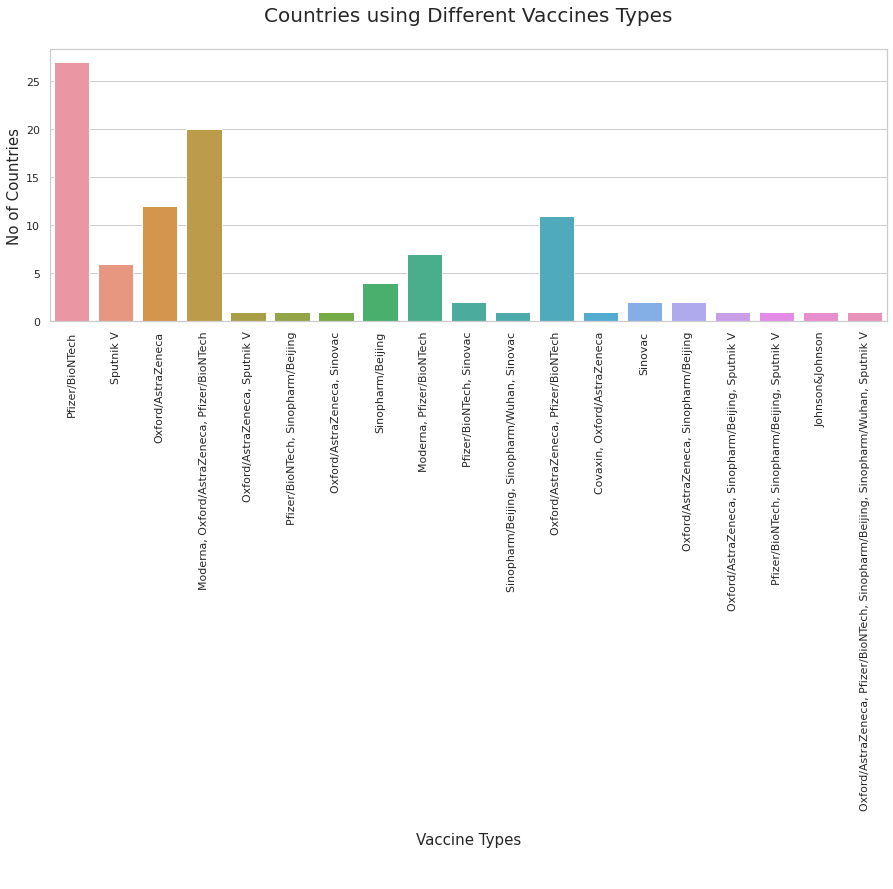

In [306]:
#Number of counties using different vaccine types/combinations
df.groupby(['country'],sort=False, as_index=False)['vaccines'].first()
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.set(style = 'whitegrid')
sns.countplot(x="vaccines", data=df.groupby(['country'],sort=False, as_index=False)['vaccines'].first())
plt.title("Countries using Different Vaccines Types\n",size =20)
plt.ylabel("No of Countries",size=15)
plt.xlabel("\nVaccine Types\n\n",size=15)


In [307]:
#Finding Maximum number of people vaccinated in each country
vaccine = df.groupby(["country","vaccines"])['total_vaccinations','total_vaccinations_per_hundred',
                                       'daily_vaccinations','daily_vaccinations_per_million'].max().reset_index()
vaccine

,country,vaccines,total_vaccinations,total_vaccinations_per_hundred,daily_vaccinations,daily_vaccinations_per_million
0,Albania,Pfizer/BioNTech,4177.0,0.15,405.0,141.0
1,Algeria,Sputnik V,75000.0,0.17,3748.0,85.0
2,Andorra,Pfizer/BioNTech,2141.0,2.77,100.0,1294.0
3,Anguilla,Oxford/AstraZeneca,2762.0,18.41,331.0,22064.0
4,Argentina,Sputnik V,722234.0,1.60,19820.0,439.0
...,...,...,...,...,...,...
97,Turks and Caicos Islands,Pfizer/BioNTech,6433.0,16.62,222.0,5734.0
98,United Arab Emirates,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",5557793.0,56.19,160020.0,16179.0
99,United Kingdom,"Oxford/AstraZeneca, Pfizer/BioNTech",18348165.0,27.03,445204.0,6558.0
100,United States,"Moderna, Pfizer/BioNTech",64177474.0,19.19,1716311.0,5132.0


In [308]:
#Map showing vaccine types and total vaccination
fig=px.scatter_geo(vaccine, locations='country',locationmode='country names',color='vaccines', size='total_vaccinations',hover_name='vaccines', projection='natural earth')
fig.update_layout(title='Vaccine Used by Countries with Total Vaccinated', legend_orientation='h',legend_title_text='Vaccine', autosize=False, width=800,height=600,)

In [309]:
#Visualization using choropleth
fig=px.choropleth(vaccine, locations='country',locationmode = 'country names', color='vaccines')
fig.update_layout(title='Color representation of Vaccine Used',legend_orientation='h', legend_title_text='Vaccine', autosize=False, width=800,height=600,)

In [310]:
#Showing Total Vaccinated in TreeMap
fig=px.treemap(vaccine,path=['vaccines','country'],values='total_vaccinations')
fig.update_layout(title='Tree Map based on Total Vaccination')
fig

In [311]:
#Showing Daily Vaccinated in TreeMap
fig=px.treemap(vaccine,path=['vaccines','country'],values='daily_vaccinations')
fig.update_layout(title='Tree Map based on Daily Vaccination Rate')
fig

In [312]:
#Map based on Total Vaccination
fig=px.choropleth(vaccine, locations='country', locationmode='country names', color='total_vaccinations')
fig.update_layout(title='Total Vaccinations by Country')
fig

In [313]:
#Map based on Daily Vaccination
fig=px.choropleth(vaccine, locations='country', locationmode='country names', color='daily_vaccinations')
fig.update_layout(title='Daily Vaccinations by Country')
fig

In [314]:
#Map based on vaccination per hundred
fig=px.choropleth(vaccine, locations='country', locationmode='country names', color='total_vaccinations_per_hundred')
fig.update_layout(title='Total Vaccinations Per Hundred by Country')
fig

In [315]:
#Countries with low total vaccination rate
adf=vaccine.sort_values(by='total_vaccinations').head(9)
adf

,country,vaccines,total_vaccinations,total_vaccinations_per_hundred,daily_vaccinations,daily_vaccinations_per_million
5,Australia,Pfizer/BioNTech,20.0,0.00,3.0,0.0
70,New Zealand,Pfizer/BioNTech,100.0,0.00,50.0,10.0
83,Saint Helena,Oxford/AstraZeneca,107.0,1.76,NaN,NaN
30,Egypt,Sinopharm/Beijing,1315.0,0.00,219.0,2.0
57,Liechtenstein,"Moderna, Pfizer/BioNTech",1504.0,3.94,69.0,1809.0
34,Falkland Islands,Oxford/AstraZeneca,1515.0,43.50,189.0,54264.0
42,Guyana,Oxford/AstraZeneca,1852.0,0.24,169.0,215.0
60,Macao,Sinopharm/Beijing,2000.0,0.31,595.0,916.0
2,Andorra,Pfizer/BioNTech,2141.0,2.77,100.0,1294.0


In [316]:
#Bargraph showing low total vaccinated counties
fig= px.bar(adf, x= 'country', y ='total_vaccinations',color='vaccines')
fig.update_layout(title='Countries with Low Total Vaccination and Vaccine Used',legend_orientation='v')
fig

In [317]:
#Countries with high total vaccination rate
adf=vaccine.sort_values(by='total_vaccinations',ascending=False).head(9)
adf

,country,vaccines,total_vaccinations,total_vaccinations_per_hundred,daily_vaccinations,daily_vaccinations_per_million
100,United States,"Moderna, Pfizer/BioNTech",64177474.0,19.19,1716311.0,5132.0
21,China,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",40520000.0,2.82,1916190.0,1331.0
99,United Kingdom,"Oxford/AstraZeneca, Pfizer/BioNTech",18348165.0,27.03,445204.0,6558.0
31,England,"Oxford/AstraZeneca, Pfizer/BioNTech",15471509.0,27.49,376532.0,6690.0
45,India,"Covaxin, Oxford/AstraZeneca",11424094.0,0.83,415332.0,301.0
50,Israel,"Moderna, Pfizer/BioNTech",7535543.0,87.06,184633.0,21331.0
15,Brazil,"Oxford/AstraZeneca, Sinovac",7028356.0,3.31,262717.0,1236.0
96,Turkey,Sinovac,6837302.0,8.11,435596.0,5165.0
98,United Arab Emirates,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",5557793.0,56.19,160020.0,16179.0


In [318]:
#Bargraph showing high total vaccinated counties
fig= px.bar(adf, x= 'country', y ='total_vaccinations',color='vaccines')
fig.update_layout(title='Countries with High Total Vaccination and Vaccine Used',showlegend=False)
fig

In [319]:
#Countries with low daily vaccination rate
adf=vaccine.sort_values(by='daily_vaccinations').head(9)
adf

,country,vaccines,total_vaccinations,total_vaccinations_per_hundred,daily_vaccinations,daily_vaccinations_per_million
5,Australia,Pfizer/BioNTech,20.0,0.00,3.0,0.0
70,New Zealand,Pfizer/BioNTech,100.0,0.00,50.0,10.0
57,Liechtenstein,"Moderna, Pfizer/BioNTech",1504.0,3.94,69.0,1809.0
2,Andorra,Pfizer/BioNTech,2141.0,2.77,100.0,1294.0
65,Monaco,Pfizer/BioNTech,2400.0,6.12,126.0,3211.0
33,Faeroe Islands,Pfizer/BioNTech,5682.0,11.63,135.0,2763.0
42,Guyana,Oxford/AstraZeneca,1852.0,0.24,169.0,215.0
34,Falkland Islands,Oxford/AstraZeneca,1515.0,43.50,189.0,54264.0
30,Egypt,Sinopharm/Beijing,1315.0,0.00,219.0,2.0


In [320]:
#Bargraph showing low daily vaccinated counties
fig= px.bar(adf, x= 'country', y ='daily_vaccinations',color='vaccines')
fig.update_layout(title='Countries with Low daily Vaccination and Vaccine Used',legend_orientation='v',autosize=False, width=700,height=600,)
fig

In [321]:
#Countries with high daily vaccination rate
adf=vaccine.sort_values(by='daily_vaccinations',ascending=False).head(9)
adf

,country,vaccines,total_vaccinations,total_vaccinations_per_hundred,daily_vaccinations,daily_vaccinations_per_million
21,China,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",40520000.0,2.82,1916190.0,1331.0
100,United States,"Moderna, Pfizer/BioNTech",64177474.0,19.19,1716311.0,5132.0
99,United Kingdom,"Oxford/AstraZeneca, Pfizer/BioNTech",18348165.0,27.03,445204.0,6558.0
96,Turkey,Sinovac,6837302.0,8.11,435596.0,5165.0
45,India,"Covaxin, Oxford/AstraZeneca",11424094.0,0.83,415332.0,301.0
31,England,"Oxford/AstraZeneca, Pfizer/BioNTech",15471509.0,27.49,376532.0,6690.0
15,Brazil,"Oxford/AstraZeneca, Sinovac",7028356.0,3.31,262717.0,1236.0
66,Morocco,"Oxford/AstraZeneca, Sinopharm/Beijing",2575684.0,6.98,196829.0,5333.0
9,Bangladesh,Oxford/AstraZeneca,2308157.0,1.40,196796.0,1195.0


In [322]:
#Bargraph showing high daily vaccinated counties
fig= px.bar(adf, x= 'country', y ='daily_vaccinations',color='vaccines')
fig.update_layout(title='Countries with High daily Vaccination and Vaccine Used',legend_orientation='v',autosize=False, width=800,height=600,)
fig

In [323]:
#Total of each Vaccine used
vac = df.groupby("vaccines")['total_vaccinations'].sum().astype(int).reset_index()
vac

,vaccines,total_vaccinations
0,"Covaxin, Oxford/AstraZeneca",186443528
1,Johnson&Johnson,57645
2,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",527177568
3,"Moderna, Pfizer/BioNTech",1680457238
4,Oxford/AstraZeneca,18475202
5,"Oxford/AstraZeneca, Pfizer/BioNTech",912139461
6,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",147334941
7,"Oxford/AstraZeneca, Sinopharm/Beijing",23825912
8,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",152878
9,"Oxford/AstraZeneca, Sinovac",112816107


In [324]:
#Piechart showing total different combinations of vaccines used by countries
fig=px.pie(vac,values='total_vaccinations',names='vaccines',labels={'vaccines':'Vaccine','total_vaccinations':'Total'})
fig.update_layout(title='Total vaccines given by Vaccines/Vaccines combinations',showlegend=False)
fig